<a href="https://colab.research.google.com/github/Sadam1122/Tugas-AI-Big-Data/blob/main/Tugas_AI_Sadam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresion Linier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings


In [3]:
# Load Iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']

In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [5]:
# Data standardization
minmax = MinMaxScaler(feature_range=(0, 1))
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [6]:
# Dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [7]:
# Helper function
def run_classifier(clf, param_grid, title):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
    gs = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=cv, scoring='accuracy')
    gs.fit(X_train_pca, y_train)

    print("The best parameters are %s" % (gs.best_params_))

    y_pred = gs.best_estimator_.predict(X_test_pca)

    print('Accuracy score: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average='weighted') * 100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average='weighted') * 100))

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt="d", linewidths=0.5, cmap="Blues", ax=ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    ax1.set_xticklabels(target_names)
    ax1.set_yticklabels(target_names)

    cmap = ListedColormap(('red', 'green', 'blue'))
    x1_min, x1_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    x2_min, x2_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    resolution = 0.02
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = gs.best_estimator_.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax2.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, cl in enumerate(np.unique(y_test)):
        ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker='o', label=target_names[cl], edgecolor='black')

    ax2.set_title(title)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.legend(loc='lower right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

The best parameters are {'solver': 'lbfgs', 'max_iter': 100, 'learning_rate': 'constant', 'hidden_layer_sizes': (10,), 'alpha': 0.1, 'activation': 'tanh'}
Accuracy score: 92.11%
Precision score: 92.26%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


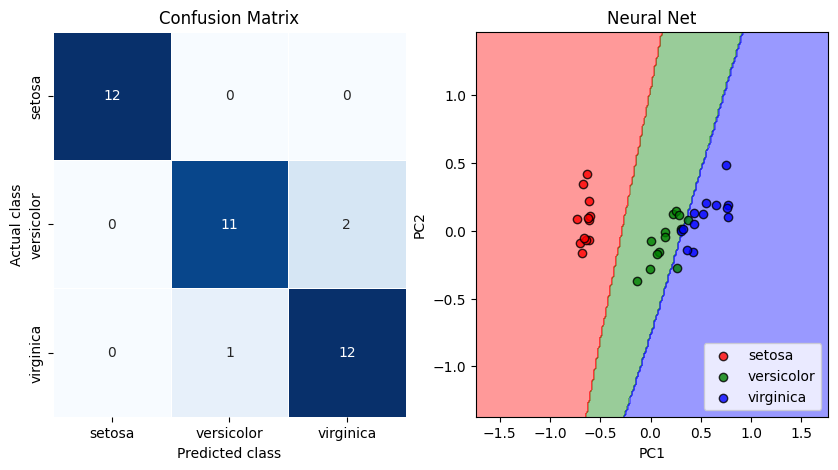

In [13]:
# Multi-layer Perceptron
mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': np.logspace(-5, 3, 5), 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [100, 500, 1000]}
run_classifier(mlp, param_grid,'Neural Net')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best parameters are {'solver': 'newton-cg', 'penalty': 'l2'}
Accuracy score: 86.84%
Precision score: 90.50%
Recall score: 86.84%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


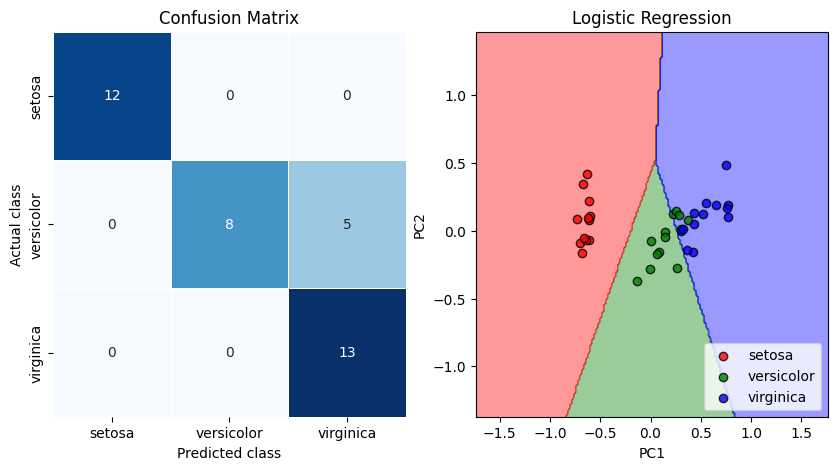

In [10]:
# Logistic Regression
lr = LogisticRegression()
param_grid = {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
run_classifier(lr, param_grid, 'Logistic Regression')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

The best parameters are {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'gini'}
Accuracy score: 94.74%
Precision score: 94.74%
Recall score: 94.74%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


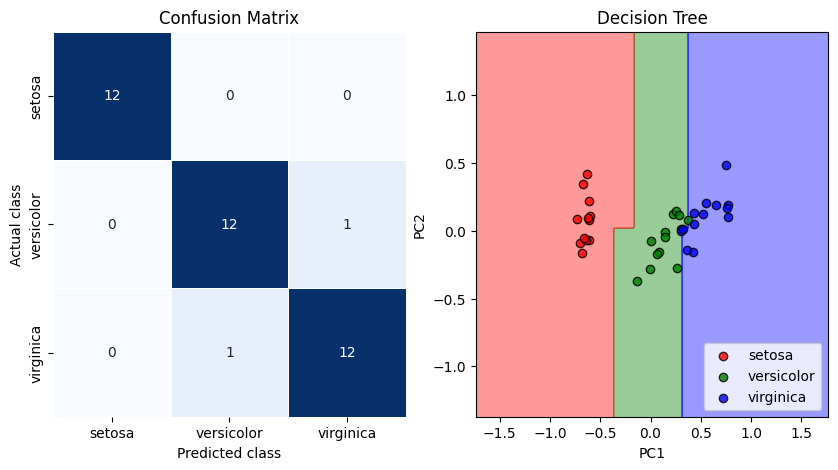

In [11]:
# Decision Tree
dtree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': np.arange(1, 20, 2), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10], 'max_features': ['auto', 'sqrt', 'log2', None]}
run_classifier(dtree, param_grid, "Decision Tree")

The best parameters are {'reg_param': 0.0, 'priors': None}
Accuracy score: 92.11%
Precision score: 92.26%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


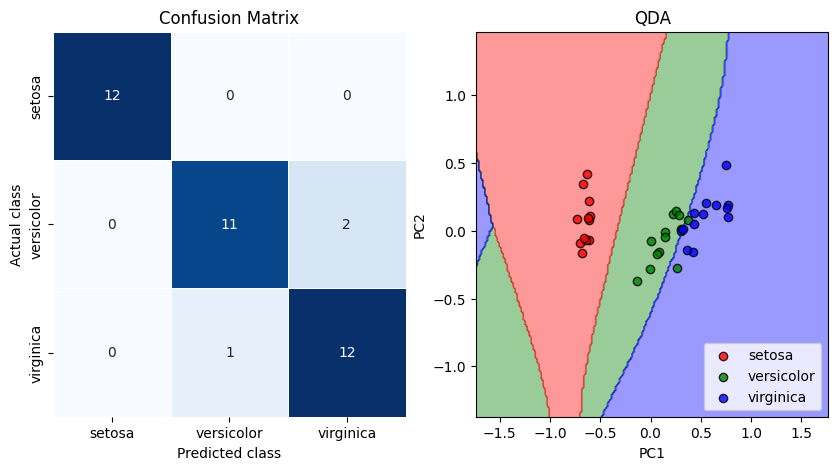

In [12]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
param_grid = {'priors': [None], 'reg_param': np.arange(0., 1., 0.1)}
run_classifier(qda, param_grid, "QDA")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best parameters are {'weights': [3, 1, 3]}
Accuracy score: 92.11%
Precision score: 93.59%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


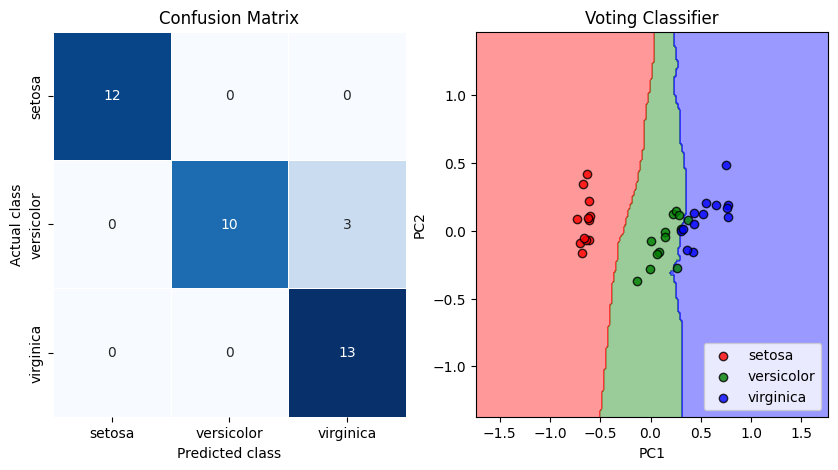

In [14]:
# Voting Classifier
vc = VotingClassifier(estimators=[('knn', knn), ('dt', dtree), ('svc', svm_rbf)], voting='soft')
param_grid = {'weights': [[1, 1, 1], [2, 1, 2], [3, 1, 3]]}
run_classifier(vc, param_grid, "Voting Classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best parameters are {'priors': None}
Accuracy score: 92.11%
Precision score: 93.59%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


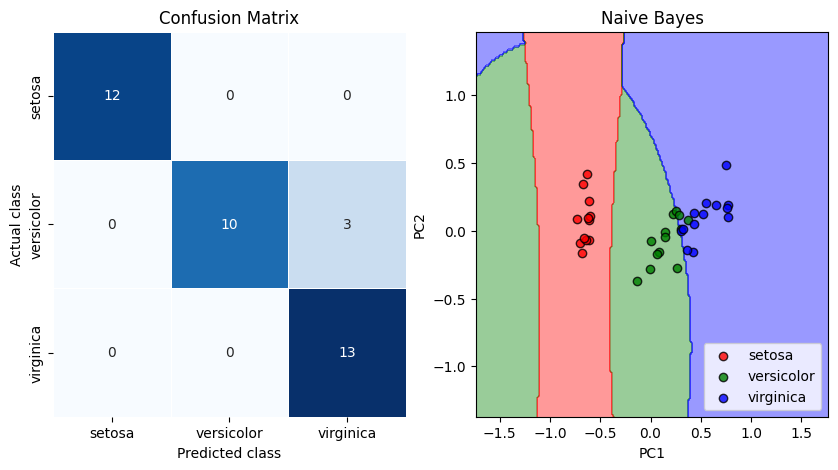

In [15]:
# Naive Bayes
nb = GaussianNB()
param_grid = {'priors': [None]}
run_classifier(nb, param_grid, 'Naive Bayes')

The best parameters are {'gamma': 100.0, 'C': 100.0}
Accuracy score: 92.11%
Precision score: 92.26%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


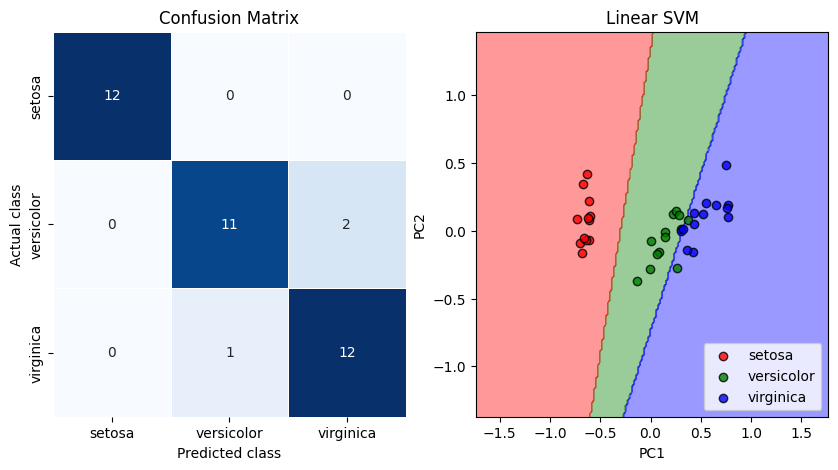

In [16]:
# Linear SVM
svm_linear = SVC(kernel="linear", probability=True)
param_grid = {'gamma': np.logspace(-2, 2, 5), 'C': np.logspace(-2, 2, 5)}
run_classifier(svm_linear, param_grid, 'Linear SVM')

The best parameters are {'gamma': 10.0, 'C': 1.0}
Accuracy score: 92.11%
Precision score: 92.26%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


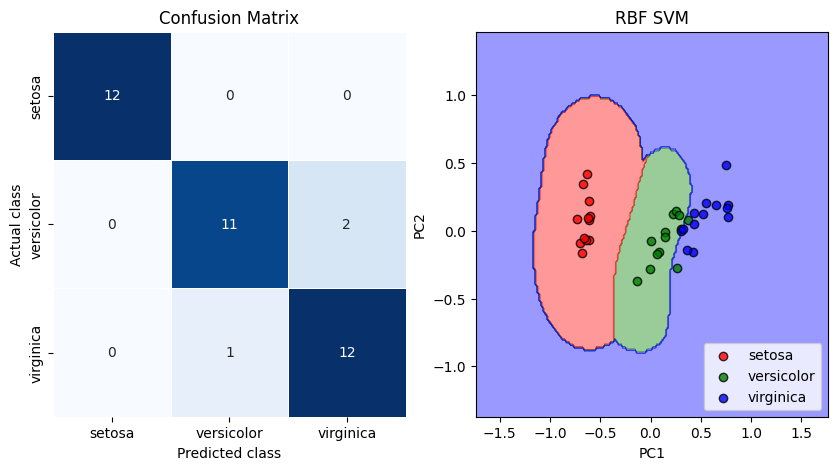

In [17]:
# RBF SVM
svm_rbf = SVC(kernel="rbf", probability=True)
param_grid = {'gamma': np.logspace(-2, 2, 5), 'C': np.logspace(-2, 2, 5)}
run_classifier(svm_rbf, param_grid, "RBF SVM")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

The best parameters are {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Accuracy score: 94.74%
Precision score: 94.74%
Recall score: 94.74%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


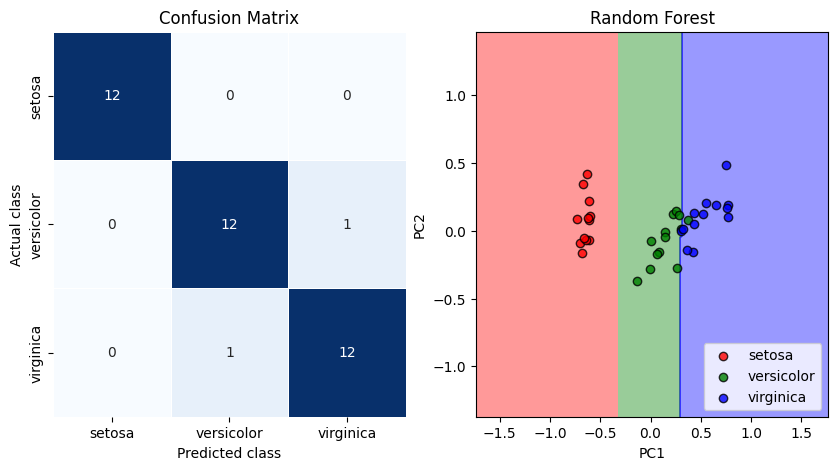

In [18]:
# Random Forest
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, 100, None], 'max_features': ['auto', 'sqrt', None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}
run_classifier(rf, param_grid, 'Random Forest')

The best parameters are {'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 3, 'algorithm': 'kd_tree'}
Accuracy score: 92.11%
Precision score: 93.59%
Recall score: 92.11%


<ipython-input-7-1eeaf159493d>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(x=X_test_pca[y_test == cl, 0], y=X_test_pca[y_test == cl, 1],


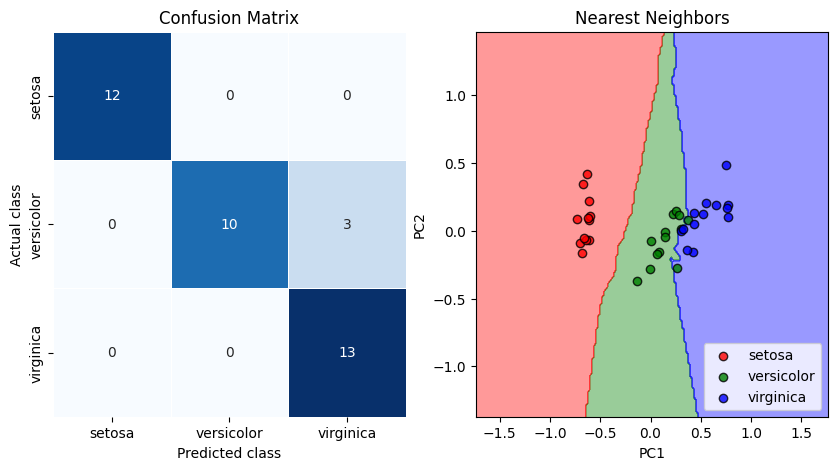

In [19]:
# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15), 'weights': ['uniform', 'distance'], 'leaf_size': [1, 3, 5], 'algorithm': ['auto', 'kd_tree']}
run_classifier(knn, param_grid, 'Nearest Neighbors')